In [16]:
!pip install StandardScaler PCA
!pip install numpy matplotlib scikit-learn
!pip install sklearn.preprocessing

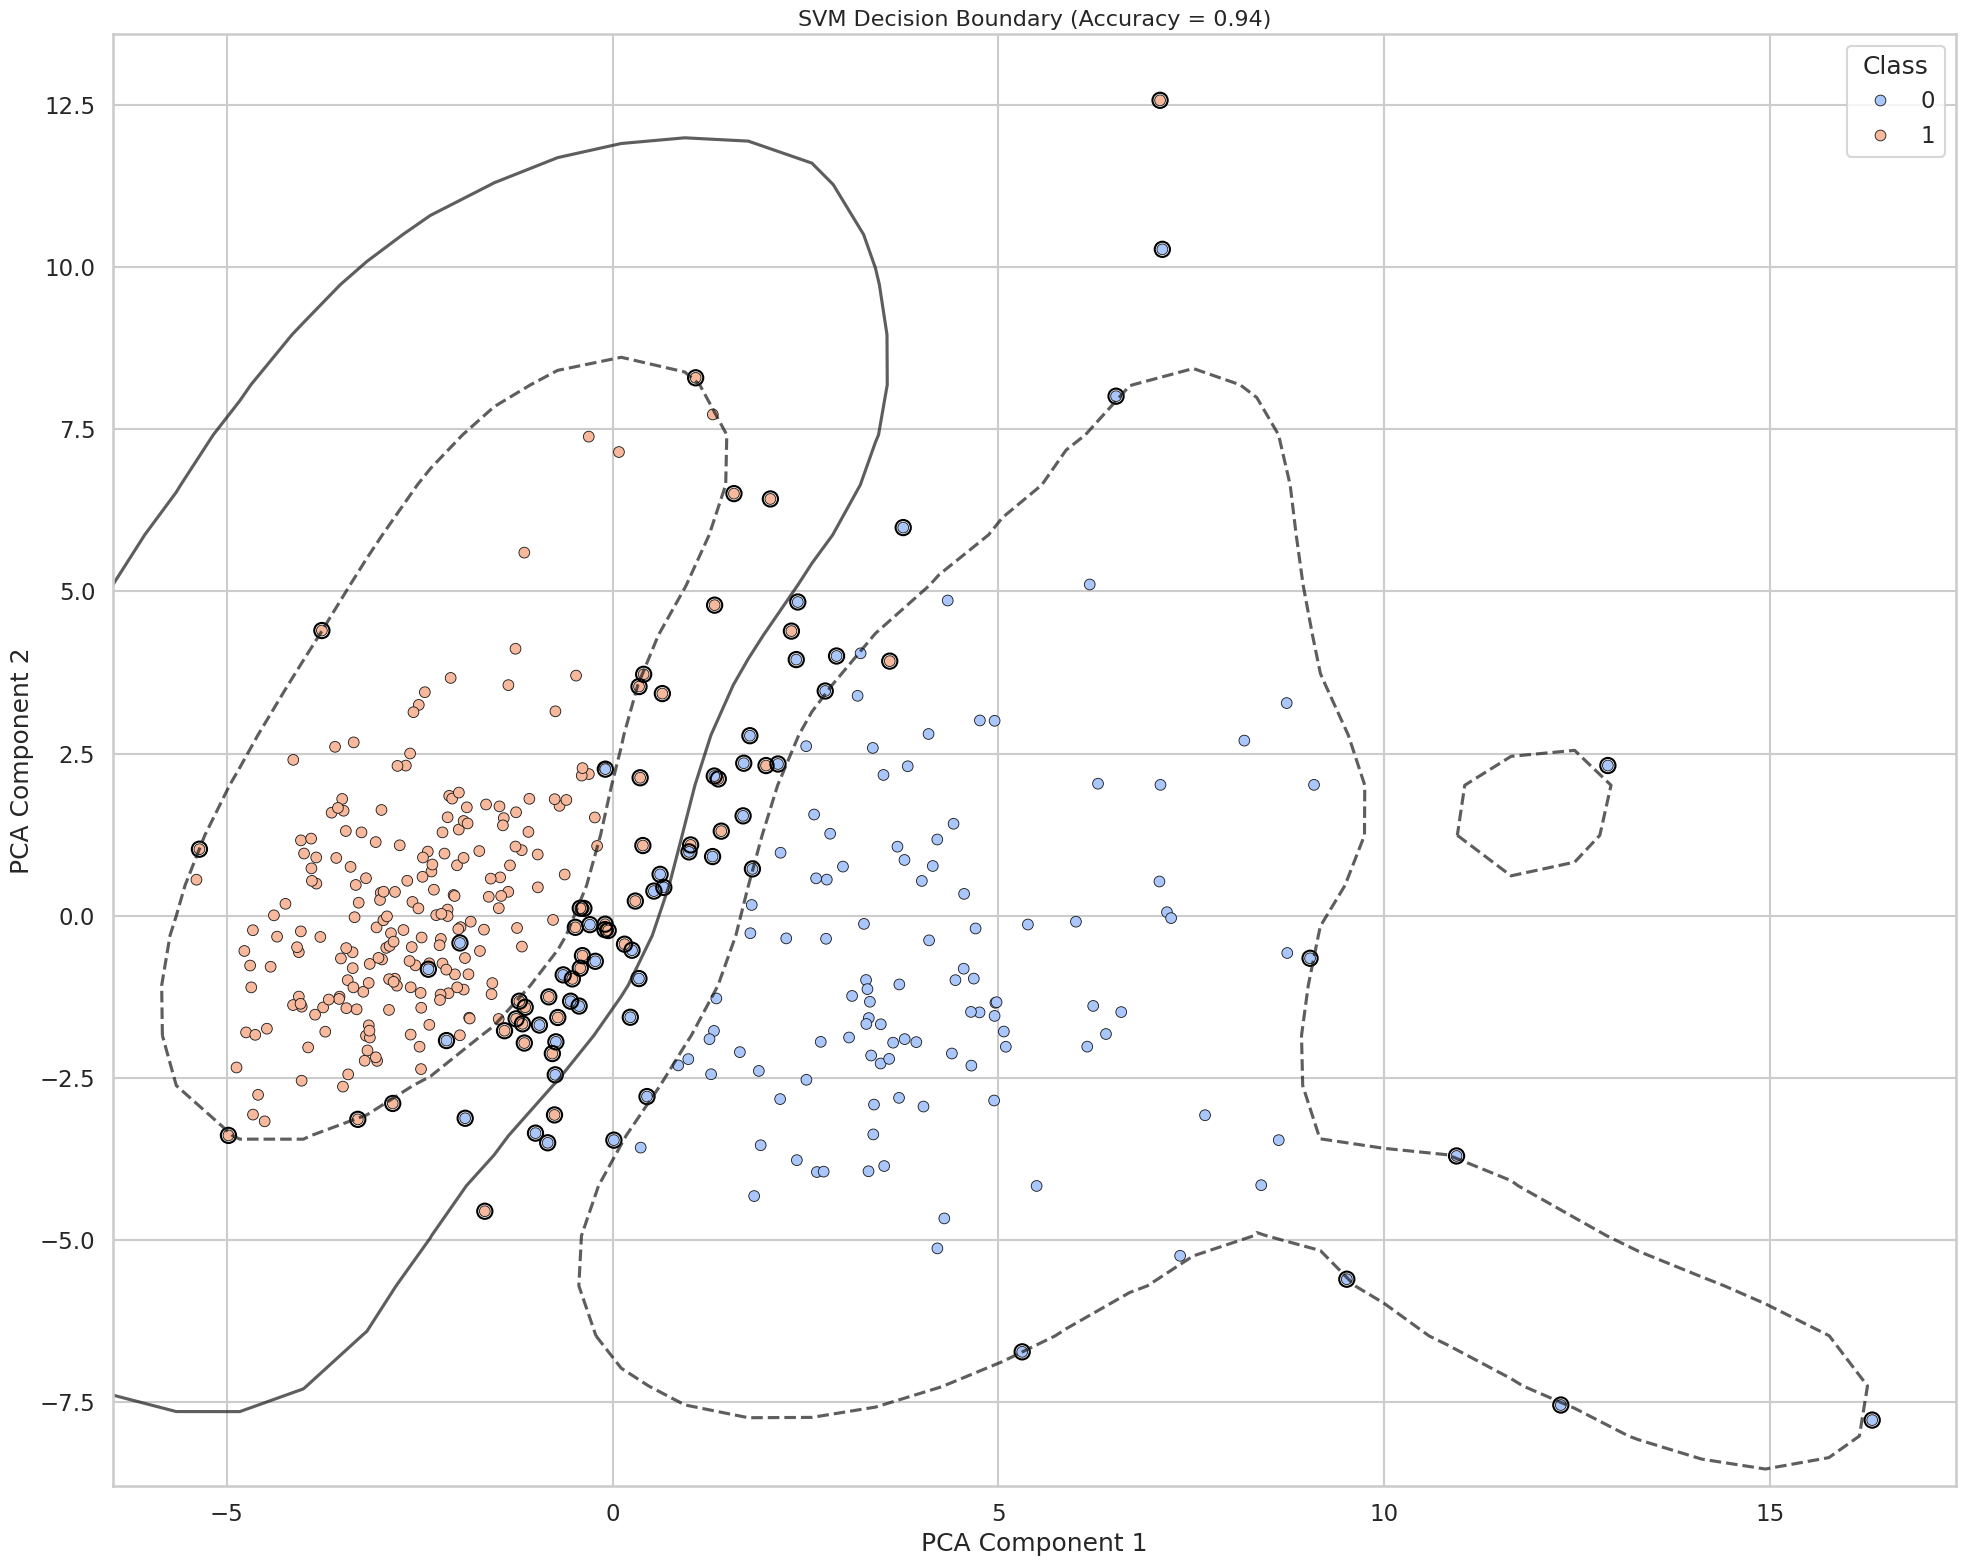

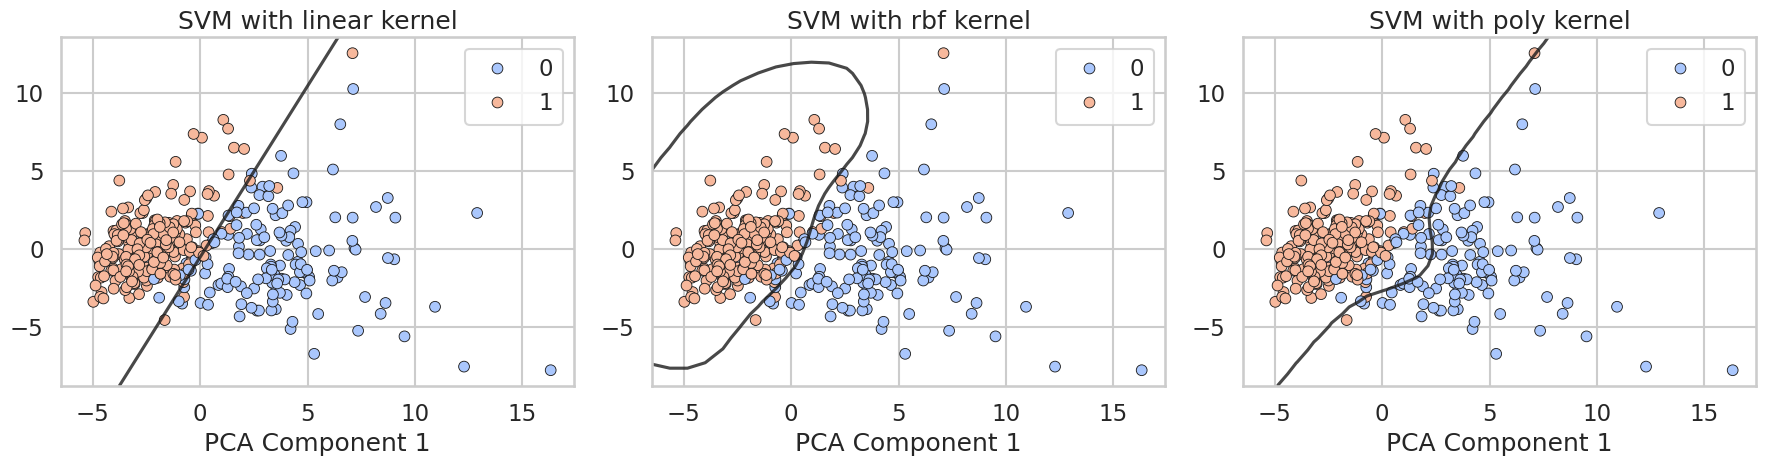

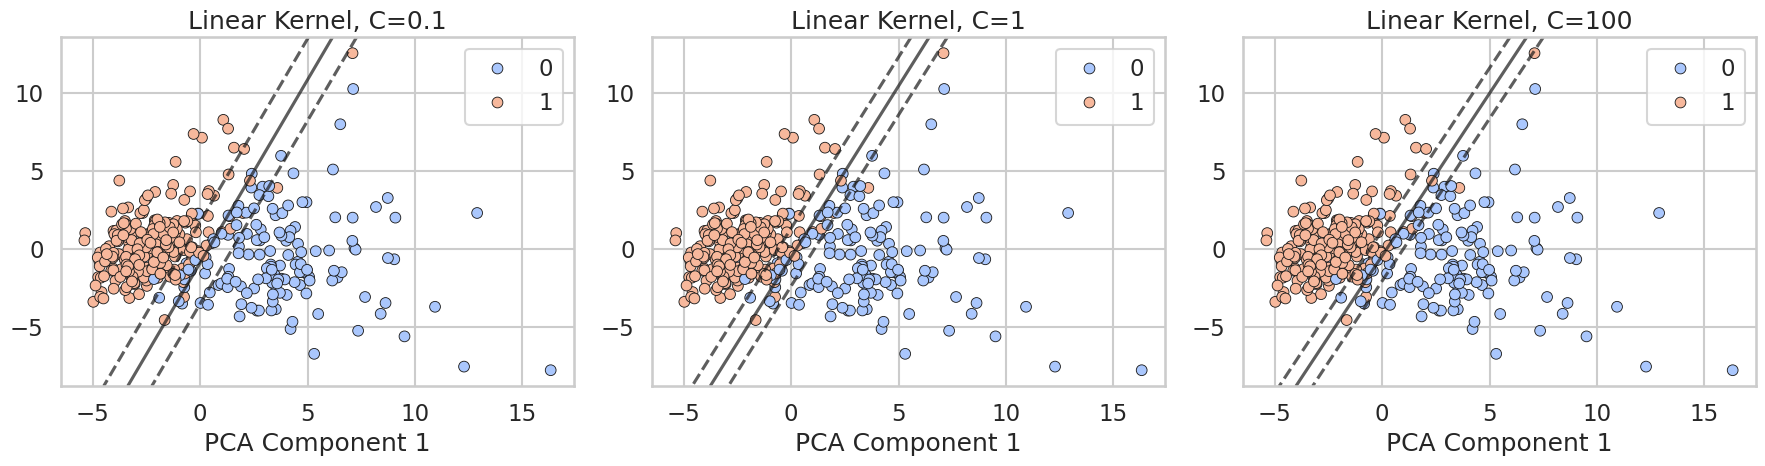

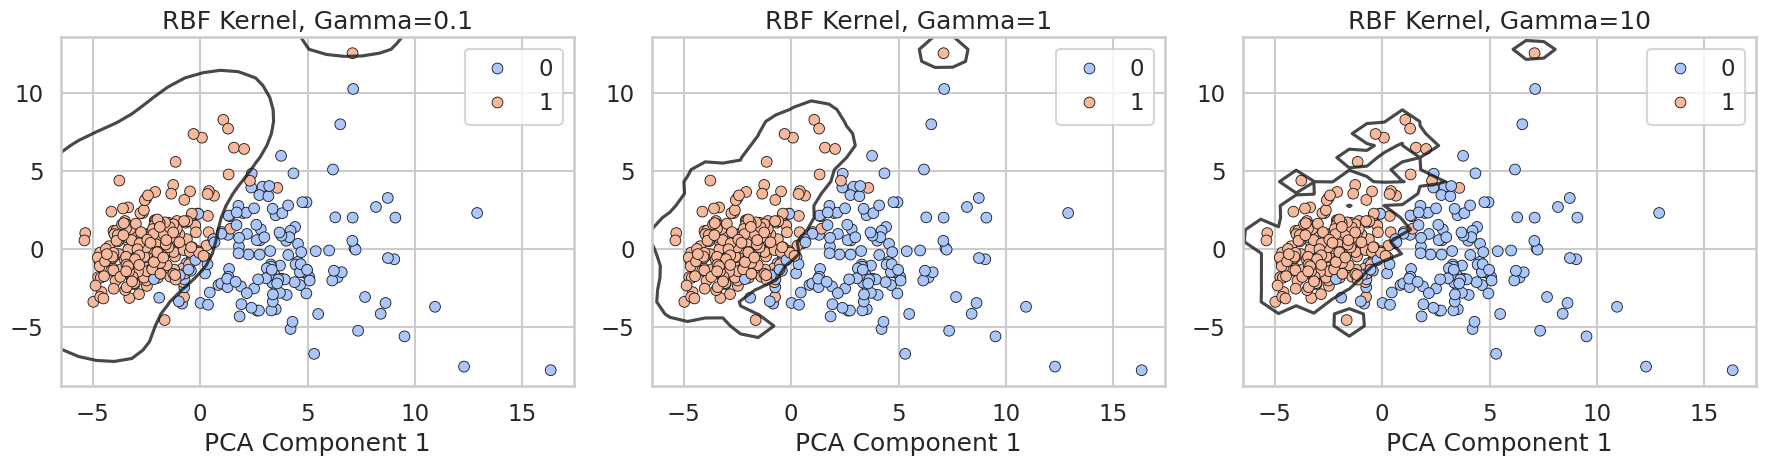

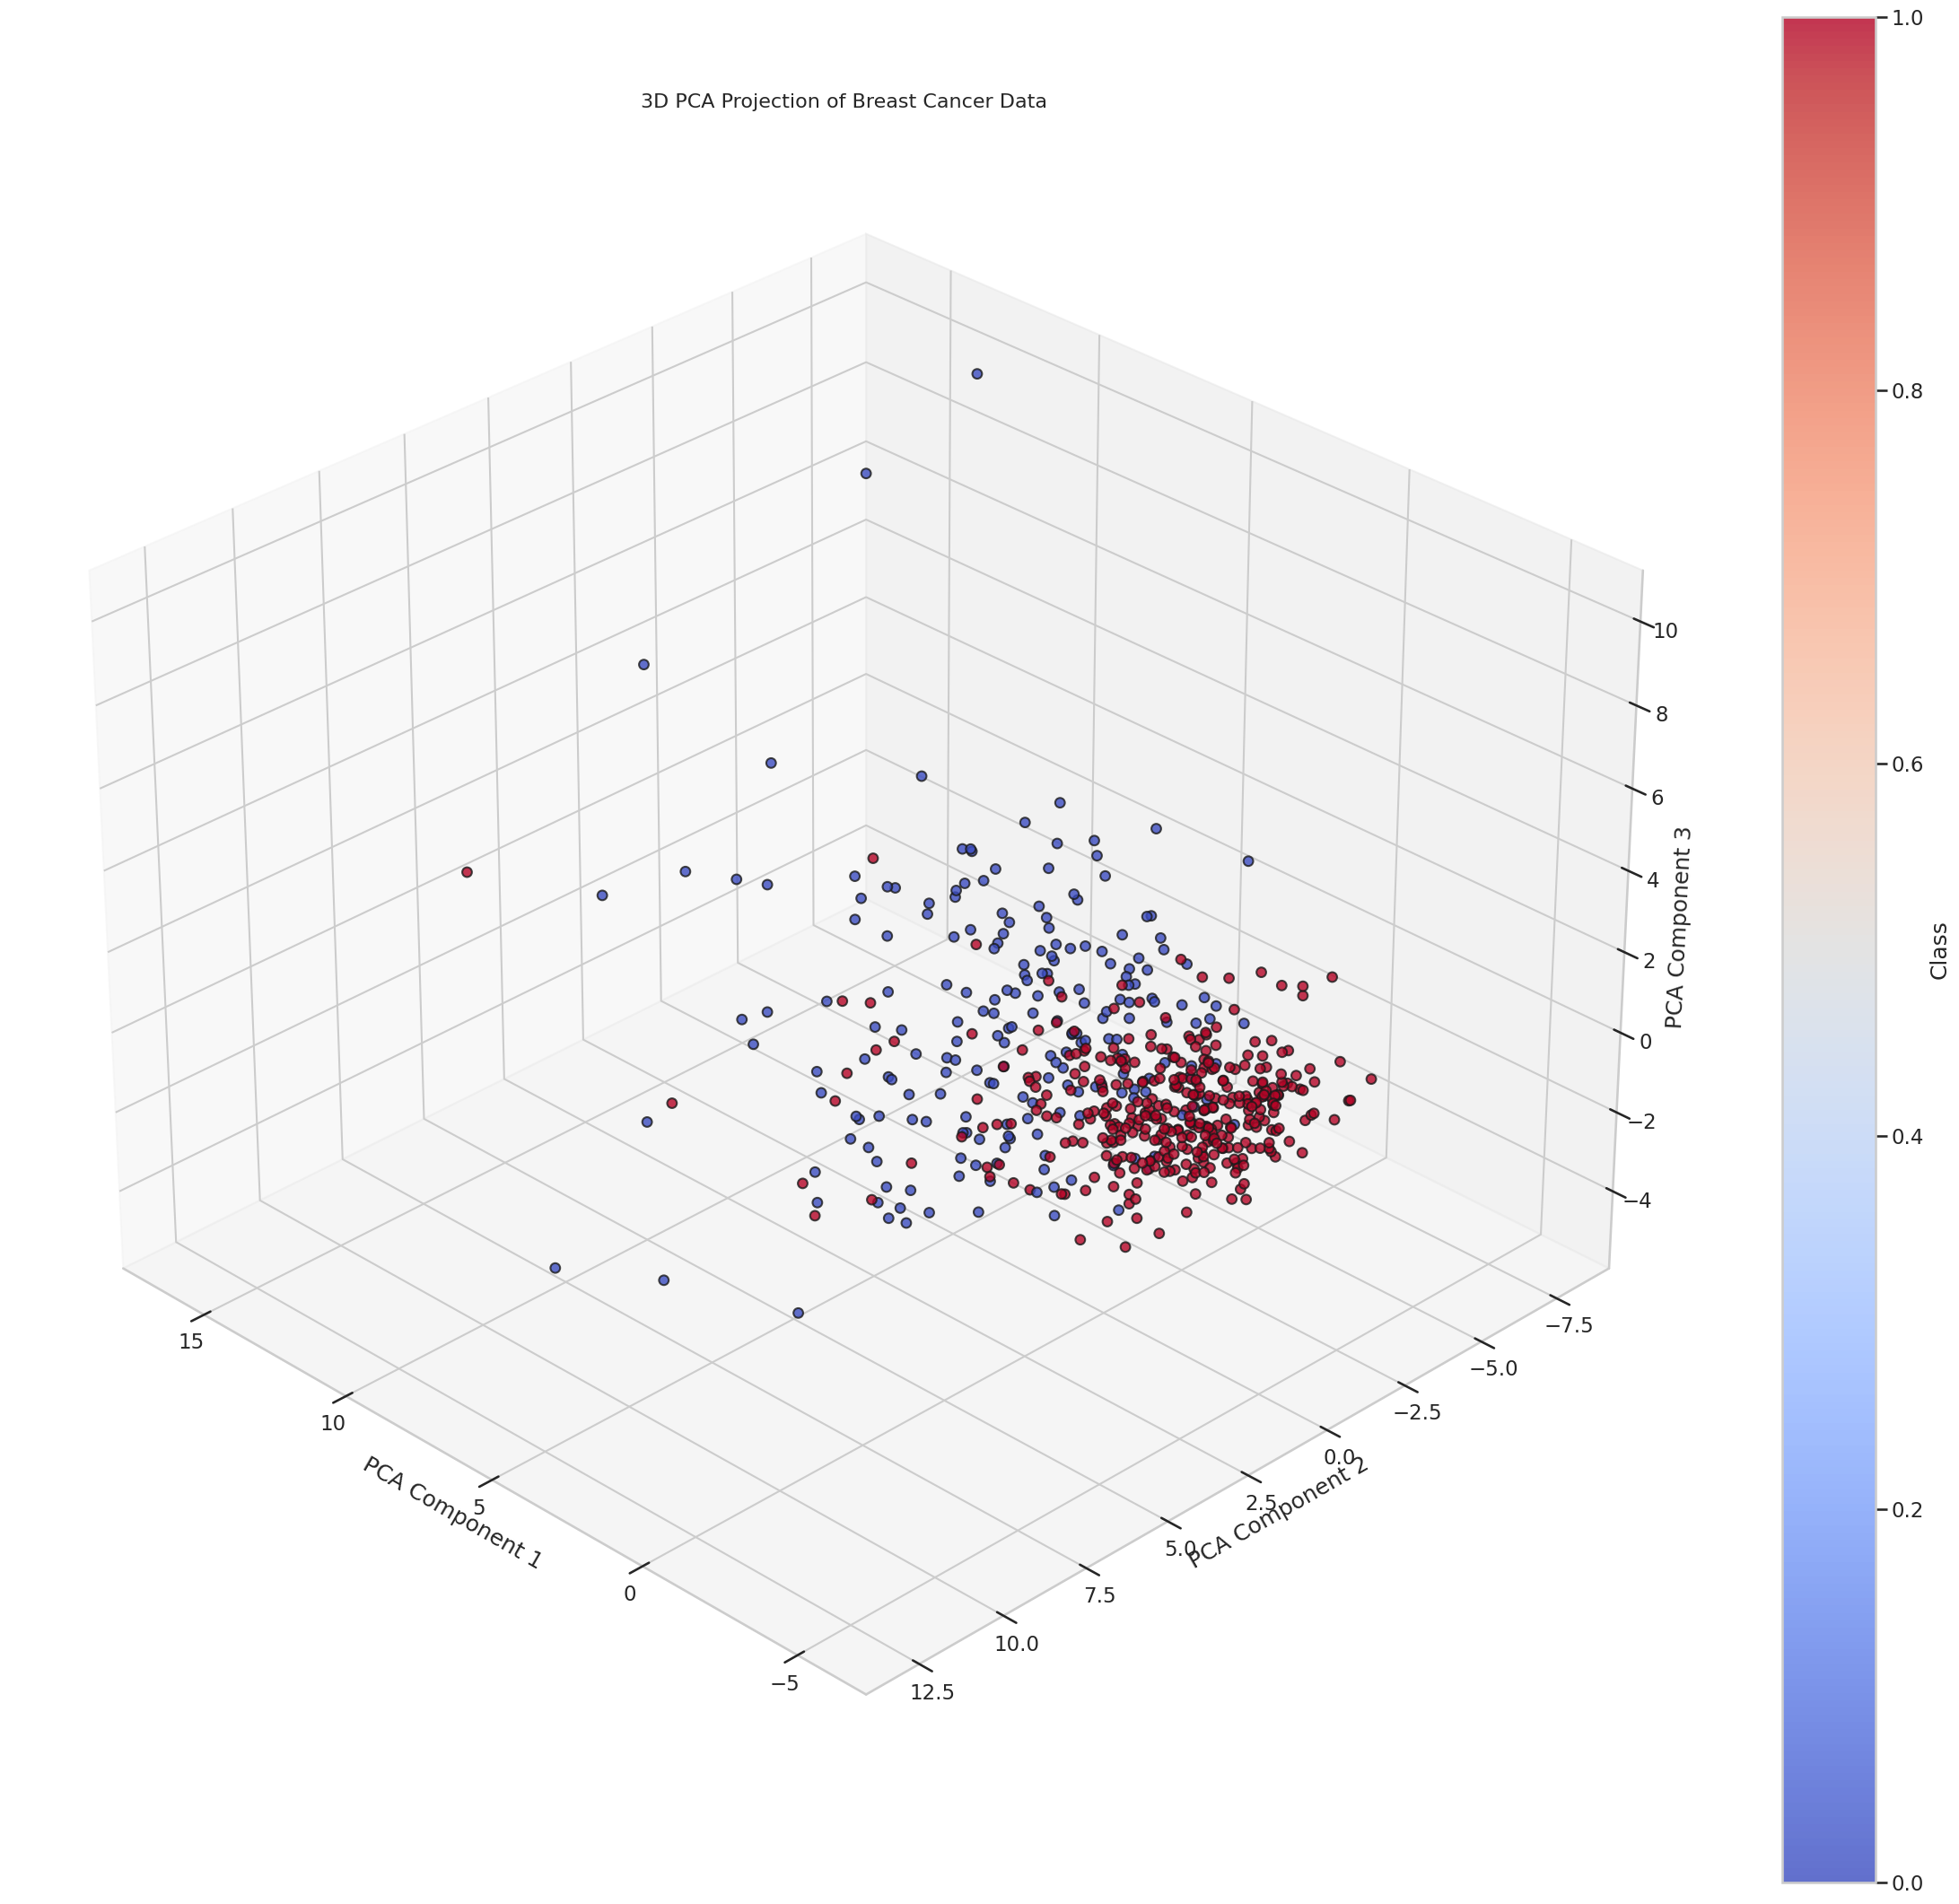

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# Set seaborn style
sns.set(style="whitegrid", context="talk")

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocess
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_2d = PCA(n_components=2).fit_transform(X_scaled)
X_3d = PCA(n_components=3).fit_transform(X_scaled)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Train SVM
clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)

# Decision Boundary
plt.figure(figsize=(20, 16))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', edgecolor='k', s=60)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'], alpha=0.7)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=1.5, facecolors='none', edgecolors='black')
plt.title(f"SVM Decision Boundary (Accuracy = {acc:.2f})", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Class')
plt.tight_layout()
plt.show()

# Kernel Comparison
kernels = ['linear', 'rbf', 'poly']
plt.figure(figsize=(18, 5))
for i, kernel in enumerate(kernels):
    clf = svm.SVC(kernel=kernel, gamma='scale', C=1)
    clf.fit(X_train, y_train)
    Z = clf.decision_function(xy).reshape(XX.shape)

    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', edgecolor='k', s=60)
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.8)
    plt.title(f"SVM with {kernel} kernel")
    plt.xlabel("PCA Component 1")
plt.tight_layout()
plt.show()

# C parameter comparison
C_values = [0.1, 1, 100]
plt.figure(figsize=(18, 5))
for i, C in enumerate(C_values):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    Z = clf.decision_function(xy).reshape(XX.shape)

    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', edgecolor='k', s=60)
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'], alpha=0.7)
    plt.title(f"Linear Kernel, C={C}")
    plt.xlabel("PCA Component 1")
plt.tight_layout()
plt.show()

# Gamma parameter effect
gamma_values = [0.1, 1, 10]
plt.figure(figsize=(18, 5))
for i, gamma in enumerate(gamma_values):
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=1)
    clf.fit(X_train, y_train)
    Z = clf.decision_function(xy).reshape(XX.shape)

    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', edgecolor='k', s=60)
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.8)
    plt.title(f"RBF Kernel, Gamma={gamma}")
    plt.xlabel("PCA Component 1")
plt.tight_layout()
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(30, 27))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='coolwarm', s=60, edgecolors='k', alpha=0.8)
ax.view_init(elev=30, azim=135)
fig.colorbar(p, label='Class')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title("3D PCA Projection of Breast Cancer Data", fontsize=16)
plt.show()
